## Роман Аблизен .
## ДЗ 2 (основные результаты приведены в конце ноутбука)

In [ ]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import copy
from scipy.sparse import csr_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
def pickle_load(fname):
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
players_data = pickle_load('chgk/players.pkl')

In [4]:
tourns_data = pickle_load('chgk/tournaments.pkl')

In [5]:
results_data = pickle_load('chgk/results.pkl')

### Игроки

In [8]:
players = pd.DataFrame.from_dict(players_data, orient='index')

In [9]:
players.head()

,id,name,patronymic,surname
1,1,Алексей,None,Абабилов
10,10,Игорь,,Абалов
11,11,Наталья,Юрьевна,Абалымова
12,12,Артур,Евгеньевич,Абальян
13,13,Эрик,Евгеньевич,Абальян


### Турниры

In [10]:
tourns = pd.DataFrame.from_dict(tourns_data, orient='index')

In [11]:
tourns["dateStart"] = pd.to_datetime(tourns.dateStart, utc=True, errors = 'raise')

In [12]:
train_tourns = tourns[tourns['dateStart'].dt.year == 2019]

In [13]:
test_tourns = tourns[tourns['dateStart'].dt.year == 2020]

In [14]:
train_tourns.head()

,id,name,dateStart,dateEnd,type,season,orgcommittee,synchData,questionQty
4772,4772,Синхрон северных стран. Зимний выпуск,2019-01-05 16:00:00+00:00,2019-01-09T19:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/52,"[{'id': 28379, 'name': 'Константин', 'patronym...",{'dateRequestsAllowedTo': '2019-01-09T23:59:59...,"{'1': 12, '2': 12, '3': 12}"
4973,4973,Балтийский Берег. 3 игра,2019-01-25 16:05:00+00:00,2019-01-29T19:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/52,"[{'id': 23030, 'name': 'Марина', 'patronymic':...",{'dateRequestsAllowedTo': '2019-01-28T23:59:59...,"{'1': 12, '2': 12, '3': 12}"
4974,4974,Балтийский Берег. 4 игра,2019-03-01 16:05:00+00:00,2019-03-05T19:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/52,"[{'id': 23030, 'name': 'Марина', 'patronymic':...",{'dateRequestsAllowedTo': '2019-03-04T23:59:59...,"{'1': 12, '2': 12, '3': 12}"
4975,4975,Балтийский Берег. 5 игра,2019-04-05 16:05:00+00:00,2019-04-09T19:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/52,"[{'id': 23030, 'name': 'Марина', 'patronymic':...",{'dateRequestsAllowedTo': '2019-04-08T23:59:59...,"{'1': 12, '2': 12, '3': 12}"
4986,4986,ОВСЧ. 6 этап,2019-02-15 17:00:00+00:00,2019-02-19T20:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/52,"[{'id': 59140, 'name': 'Борис', 'patronymic': ...",{'dateRequestsAllowedTo': '2019-02-19T23:59:59...,"{'1': 12, '2': 12, '3': 12}"


### Результаты

In [13]:
results = pd.DataFrame.from_dict(results_data, orient='index')


In [14]:
results.head()

,0,1,2,3,4,5,6,7,8,9,...,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063
1,"{'team': {'id': 242, 'name': 'Команда Азимова'...","{'team': {'id': 640, 'name': 'Перезагрузка', '...","{'team': {'id': 245, 'name': 'Айастан', 'town'...","{'team': {'id': 299, 'name': 'Команда Гусейнов...","{'team': {'id': 1189, 'name': 'Грааль', 'town'...","{'team': {'id': 251, 'name': 'Пентиум', 'town'...","{'team': {'id': 268, 'name': 'Команда Алиева',...","{'team': {'id': 307, 'name': 'Третий путь', 't...","{'team': {'id': 543, 'name': 'Команда Мусаева'...","{'team': {'id': 41, 'name': 'Фантазия', 'town'...",...,None,None,None,None,None,None,None,None,None,None
2,"{'team': {'id': 312, 'name': 'Социал-демократы...","{'team': {'id': 510, 'name': 'Импульс', 'town'...","{'team': {'id': 195, 'name': 'Реал-Мордовия', ...","{'team': {'id': 264, 'name': 'Джокер', 'town':...","{'team': {'id': 240, 'name': 'Бегемот', 'town'...","{'team': {'id': 689, 'name': 'Б-52', 'town': {...","{'team': {'id': 258, 'name': 'МордоBOYS', 'tow...","{'team': {'id': 558, 'name': 'НТР', 'town': {'...","{'team': {'id': 285, 'name': 'Лис', 'town': {'...","{'team': {'id': 361, 'name': '1Ф', 'town': {'i...",...,None,None,None,None,None,None,None,None,None,None
3,"{'team': {'id': 175, 'name': 'Транссфера', 'to...","{'team': {'id': 5, 'name': 'Команда Кузьмина',...","{'team': {'id': 670, 'name': 'Ксеп', 'town': {...","{'team': {'id': 194, 'name': 'Десятый вал', 't...","{'team': {'id': 1, 'name': 'Неспроста', 'town'...","{'team': {'id': 14, 'name': 'СПС', 'town': {'i...","{'team': {'id': 188, 'name': 'Команда Губанова...","{'team': {'id': 173, 'name': 'ЮМА', 'town': {'...","{'team': {'id': 200, 'name': 'ОНУ им. Мечников...","{'team': {'id': 1733, 'name': 'Суббота 13', 't...",...,None,None,None,None,None,None,None,None,None,None
4,"{'team': {'id': 2205, 'name': 'ХИИТ - 2000', '...","{'team': {'id': 26956, 'name': 'Приматы', 'tow...","{'team': {'id': 26955, 'name': 'Сливки - Форс-...","{'team': {'id': 192, 'name': 'Гамбринус', 'tow...","{'team': {'id': 83, 'name': 'МПС', 'town': {'i...","{'team': {'id': 695, 'name': 'Легион', 'town':...","{'team': {'id': 552, 'name': 'Дуплет', 'town':...","{'team': {'id': 293, 'name': 'Чёрная кошка', '...","{'team': {'id': 493, 'name': 'Beit Grand - Або...","{'team': {'id': 267, 'name': 'Торпедный отсек'...",...,None,None,None,None,None,None,None,None,None,None
5,"{'team': {'id': 1733, 'name': 'Суббота 13', 't...","{'team': {'id': 108, 'name': 'Задумчивый жираф...","{'team': {'id': 425, 'name': 'Бостон-6', 'town...","{'team': {'id': 271, 'name': 'Саша и медведи',...","{'team': {'id': 494, 'name': 'Гигантские дятлы...","{'team': {'id': 2562, 'name': 'Мадагаскар', 't...","{'team': {'id': 100, 'name': 'Сигма', 'town': ...","{'team': {'id': 351, 'name': 'Снарки', 'town':...","{'team': {'id': 709, 'name': 'Легионеры', 'tow...","{'team': {'id': 647, 'name': 'Вашингтонские му...",...,None,None,None,None,None,None,None,None,None,None


### Найдем индексы турниров, которые будем учитывать (из условия задания)

In [15]:
train_tourns_dict = train_tourns.to_dict(orient='index')

In [16]:
tourns_inds = [] # индексы турниров, которые будем учитывать
for i, t in train_tourns_dict.items():
    resi = results_data[i]
    #print(resi)
    if resi:
        masks = [len(team['mask']) if 'mask' in team.keys() and team['mask'] else 0 for team in resi]
        if all(masks) and all([m == masks[0] for m in masks]):
            #print(i)
            #print(masks)
            tourns_inds.append(i)

In [17]:
len(tourns_inds)

661

### Итого 661 турнир
### Таблица с промежуточными данными

In [167]:
ts = [] # tournaments: [индекс турнира, [индексы игроков], [маски]] для каждого турнира (предварительная таблица)
for i in tourns_inds:
    res = results_data[i]
    masks = []
    total_pids = []
    teams_id = []
    for team in res:
        pids = [pl['player']['id'] for pl in team['teamMembers']]
        mask = team['mask']
        masks.append(list(mask))
        total_pids.append(pids)
        teams_id.append(team['team']['id'])
    t = [i, total_pids, masks, teams_id]
    ts.append(t)

### Для удобства составим предварительную таблицу турнир - список id игроков команды - маска

In [169]:
d = dict()
d['tourn_id'] = [t[0] for t in ts]
d['players_id'] = [t[1] for t in ts]
d['mask'] = [t[2] for t in ts]
d['teams_id'] = [t[3] for t in ts]
d = pd.DataFrame.from_dict(d)
d

,tourn_id,players_id,mask,teams_id
0,4772,"[[6212, 18332, 18036, 22799, 15456, 26089], [1...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,...","[45556, 1030, 4252, 5444, 40931, 47075, 53185,..."
1,4973,"[[6212, 18332, 18036, 22799, 7008, 26089], [27...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[45556, 69309, 27522, 67979, 2055, 4032, 6936,..."
2,4974,"[[19411, 24290, 32979, 5195, 33806, 9680], [27...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[2865, 69309, 6874, 27522, 56664, 1021, 4622, ..."
3,4975,"[[13345, 29425, 52183, 34417, 30772, 93424], [...","[[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,...","[4174, 45556, 70530, 7864, 7896, 27119, 33088,..."
4,4986,"[[27822, 28751, 30270, 33620, 2421], [6482, 13...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[69309, 49758, 312, 27177, 928, 38722, 45174, ..."
...,...,...,...,...
656,6159,"[[3767, 36568, 117262, 26465, 73105], [143858,...","[[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,...","[54613, 57632, 71877, 56116, 66744, 54889, 512..."
657,6161,"[[136830, 120245, 158920, 86121, 62746, 118175...","[[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,...","[72610, 66687, 60252, 66481, 67319, 73563, 695..."
658,6170,"[[163945, 139070, 92003, 188741, 152884, 19823...","[[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,...","[72577, 68404, 76209, 68397, 68401, 76242, 524..."
659,6173,"[[104370, 156977, 70136, 90627, 95086, 102051]...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,...","[59478, 44167, 65693, 50896, 75076, 55741, 412..."


### Поскольку индексы игроков пронумерованы не с 0 и не идут подряд, итоговая матрица, которую будем использовать для обучения, которая и так разреженная, будет еще больше. Поэтому переномеруем индексы игроков, чтобы они начинались с нуля и шли подряд

In [20]:
ids = []
for t in ts:
    l = t[1]
    for team in l:
        ids.extend(team)
#ids = [t[1] for t in ts]
ids = set(ids)
print(f"количество игроков: {len(ids)}")

количество игроков: 57060


In [21]:
# Новую нумерацию будем учитывать использяю словари с переходом от старых к новым индексам и наоборот
new_ids = [i for i in range(len(ids))]
pids_new2old = dict(zip(new_ids, ids))
pids_old2new = dict(zip(ids, new_ids))

### pids_new2old - словарь для перехода от новых индексов к старым, pids_old2new - наоборот


### Создадим матрицу, по которой будем обучаться, из предварительной таблицы, полученной ранее. Матрица будем выглядть следующим образом: количество столбцов равно количеству игроков+количество вопросов (соотв, каждй признак это либо сила игрока, либо сложность вопроса). Соответсвтенно, каждая строка будет соответстовать тому ( вероятности) правильно ли ответил i-ый игрок на j-ый вопрос. Для этого создадим соответствующую разреженную матрицу.
### Предварительная таблица, полученная ранее:

In [22]:
d.head() # будем использовать список ts, по которой получена данная таблица

,tourn_id,players_id,mask
0,4772,"[[6212, 18332, 18036, 22799, 15456, 26089], [1...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,..."
1,4973,"[[6212, 18332, 18036, 22799, 7008, 26089], [27...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,4974,"[[19411, 24290, 32979, 5195, 33806, 9680], [27...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,4975,"[[13345, 29425, 52183, 34417, 30772, 93424], [...","[[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,4986,"[[27822, 28751, 30270, 33620, 2421], [6482, 13...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


In [30]:
qid = 0 # текущий индекс вопроса
pids = [] # Индексы игроков
qids = [] # Индексы вопросов
y = [] # Целевая переменная
for ii,t in enumerate(ts):
    tms = t[1]
    mask = t[2]
    #print(t[0], ii)
    for j in range(len(mask[0])):
        for i in range(len(mask)):
            q = mask[i][j] # ответ i-ой команды на j-ый вопрос
            if q in '01':
                for old_id in tms[i]:
                    new_id = pids_old2new[old_id]
                    pids.append(new_id)
                    qids.append(qid+j)
                    y.append(int(q))
                    
    qid += len(mask[0])

In [31]:
print(f'количество вопросов: {qid}')

количество вопросов: 30752


### Прибавим к индексу вопроса число 57060 - количество игроков, поскольку мы конкатенируем признаки вопросы и игроки

In [32]:
qids = [q + len(ids) for q in qids ]

### Создаем разреженную матрицу. Первые 57060 столбцов - индекс игрока, следующие 30752-- индекс вопроса

In [33]:
N_players = len(ids)
N_questions = qid

In [34]:
rows = [i for i in range(2*(N_players+N_questions))]
data = [1] * (N_players+N_questions)

In [124]:
#rows = np.ones((N_players+N_questions,2)) * np.arange(N_players+N_questions).reshape(N_players+N_questions,1)
#rows = np.reshape(rows, (2*(N_players+N_questions),1))
#rows = rows.astype('int')

rows = np.ones((len(pids), 2)) * np.arange(len(pids)).reshape(len(pids),1)
rows = np.reshape(rows, (2*len(pids),1))
rows = rows.reshape(-1)
rows = rows.astype('int')

#cols = [*pids, *qids]
#cols = np.array(cols)
#cols = cols.astype('int')
#cols = cols.reshape(-1)
cols = np.zeros((len(pids),2))
cols[:,0] = np.array(pids)
cols[:,1] = np.array(qids)
cols = cols.reshape(-1)
cols = cols.astype('int')

data = [1] * 2 * len(pids)
data = np.array(data)
#data = data.reshape(-1,1)

In [125]:
X_sparse = csr_matrix((data,(rows, cols)))

### Логистическая гегрессия

In [126]:
lr = LogisticRegression(solver='sag')


In [127]:
lr.fit(X_sparse, y)

LogisticRegression(solver='sag')

### Посмотрим на топ игоков по результатам модели

In [140]:
coefs = lr.coef_
best_id = np.argsort(coefs[0][:N_players])
best_id = np.flip(best_id)
olds_best_id = [pids_new2old[i] for i in best_id[:50]]
p = [players_data[i] for i in olds_best_id]

best_c = np.sort(coefs[0][:N_players])
best_c = np.flip(best_c)
best_c[:50]

print('балл              ФИО')
for pi, c in zip(p, best_c):
    print(np.round(c,3), pi['name'], pi['patronymic'], pi['surname'])

балл              ФИО
4.157 Максим Михайлович Руссо
4.03 Александра Владимировна Брутер
3.985 Иван Николаевич Семушин
3.896 Михаил Владимирович Савченков
3.817 Сергей Леонидович Спешков
3.816 Артём Сергеевич Сорожкин
3.698 Станислав Григорьевич Мереминский
3.643 Михаил Ильич Левандовский
3.604 Ирина Сергеевна Прокофьева
3.584 Сергей Игоревич Николенко
3.551 Илья Сергеевич Новиков
3.551 Антон Владимирович Саксонов
3.549 Александр Витальевич Либер
3.513 Игорь Викторович Мокин
3.511 Александр Владимирович Мосягин
3.502 Алексей Владимирович Гилёв
3.499 Михаил Сергеевич Царёв
3.494 Дмитрий Александрович Карякин
3.491 Александр Валерьевич Марков
3.484 Наталья Евгеньевна Горелова
3.478 Наталья Алексеевна Кудряшова
3.476 Юлия Сергеевна Архангельская
3.475 Мария Владимировна Кленницкая
3.469 Евгений Павлович Спектор
3.464 Николай Валерьевич Крапиль
3.454 Юрий Яковлевич Выменец
3.452 Михаил Андреевич Новосёлов
3.452 Евгений Александрович Пашковский
3.446 Николай Александрович Коврижных
3.444 Ант

## Оцениваем результаты по 2020 году (результат по значениям корреляций в конце ноутбука)


In [142]:
test_tourns.head()

,id,name,dateStart,dateEnd,type,season,orgcommittee,synchData,questionQty
4628,4628,Семь сорок,2020-12-30 13:00:00+00:00,2020-12-30T16:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",None,"[{'id': 7533, 'name': 'Денис', 'patronymic': '...",{'dateRequestsAllowedTo': '2020-12-30T23:55:00...,"{'1': 12, '2': 12, '3': 12}"
4957,4957,Синхрон Биркиркары,2020-02-20 21:00:00+00:00,2020-02-27T23:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/53,"[{'id': 2421, 'name': 'Ася', 'patronymic': 'Се...",{'dateRequestsAllowedTo': '2020-02-27T18:00:00...,"{'1': 13, '2': 13, '3': 13}"
5151,5151,Яровой,2020-08-01 11:00:00+00:00,2020-08-05T14:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/53,"[{'id': 22325, 'name': 'Михаил', 'patronymic':...",{'dateRequestsAllowedTo': '2020-07-24T23:59:59...,"{'1': 12, '2': 12, '3': 12}"
5414,5414,Синхрон северных стран,2020-01-03 16:00:00+00:00,2020-01-10T19:00:00+03:00,"{'id': 3, 'name': 'Синхрон'}",/seasons/53,"[{'id': 28379, 'name': 'Константин', 'patronym...",{'dateRequestsAllowedTo': '2020-01-10T23:59:00...,"{'1': 12, '2': 12, '3': 12}"
5477,5477,Онлайн: Синхрон Урюбджирова,2020-04-18 16:00:00+00:00,2020-04-30T19:00:00+03:00,"{'id': 8, 'name': 'Асинхрон'}",/seasons/53,"[{'id': 91324, 'name': 'Эрдни', 'patronymic': ...",{'dateRequestsAllowedTo': '2020-04-30T23:55:00...,"{'1': 12, '2': 12, '3': 12}"


In [143]:
test_tourns_dict = test_tourns.to_dict(orient='index')

In [153]:
def team_members_played_in_2019(pl_ids, set2019):
    for i in pl_ids:
        if i not in set2019:
            return False
    return True    

In [158]:
test_tourns_inds = [] # индексы турниров, которые будем учитывать
for i, t in test_tourns_dict.items():
    resi = results_data[i]
    #print(resi)
    if resi:
        masks = [len(team['mask']) if 'mask' in team.keys() and team['mask'] else 0 for team in resi]
        if all(masks) and all([m == masks[0] for m in masks]):
            #print(i)
            #print(masks)
            #all_mids = []
            #for team in resi:
            #    members = team['teamMembers']
            #    mids = [m['player']['id'] for m in members]
            #    all_mids.append(mids)
            #if all(team_members_played_in_2019(mids, ids) for mids in all_mids):  
            test_tourns_inds.append(i)

In [178]:
def get_ts_info(tourns_inds):
    ts = [] # tournaments: [индекс турнира, [индексы игроков], [маски]] для каждого турнира (предварительная таблица)
    for i in tourns_inds:
        res = results_data[i]
        masks = []
        total_pids = []
        teams_id = []
        positions = []
        for team in res:
            pids = [pl['player']['id'] for pl in team['teamMembers']]
            mask = team['mask']
            masks.append(list(mask))
            total_pids.append(pids)
            teams_id.append(team['team']['id'])
            positions.append(team['position'])
        t = [i, total_pids, masks, teams_id, positions]
        ts.append(t)
    return ts   

In [179]:
test_ts = get_ts_info(test_tourns_inds)

In [182]:
def dict_by_ts_info(ts):
    d = dict()
    d['tourn_id'] = [t[0] for t in ts]
    d['players_id'] = [t[1] for t in ts]
    d['mask'] = [t[2] for t in ts]
    d['teams_id'] = [t[3] for t in ts]
    d['pisitions'] = [t[4] for t in ts]
    d = pd.DataFrame.from_dict(d)
    return d

In [183]:
test_d = dict_by_ts_info(test_ts)

In [202]:
test_d.head()

,tourn_id,players_id,mask,teams_id,pisitions
0,4957,"[[30152, 30270, 27822, 28751, 27403, 4270], [3...","[[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,...","[49804, 4109, 3875, 77418, 2, 45367, 4622, 417...","[1, 2, 3, 4, 5.5, 5.5, 7.5, 7.5, 9, 12, 12, 12..."
1,5414,"[[18490, 116901, 8532, 42346, 123190, 22482], ...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[66120, 312, 2, 72338, 4032, 46381, 40931, 537...","[1, 2.5, 2.5, 5, 5, 5, 8, 8, 8, 12.5, 12.5, 12..."
2,5707,"[[156788, 159570, 191802, 159566], [191086, 17...","[[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[60848, 61350, 61380, 62395, 72363, 64196, 598...","[1, 2, 4, 4, 4, 7, 7, 7, 12.5, 12.5, 12.5, 12...."
3,5708,"[[69678], [118867, 152794, 97208, 88819, 13619...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[77745, 74736, 72191, 63470, 46627, 72200, 661...","[1.5, 1.5, 4, 4, 4, 7, 7, 7, 13, 13, 13, 13, 1..."
4,5711,"[[11466, 5056, 2033, 27380, 31400], [69720, 32...","[[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,...","[51796, 71461, 49225, 1733, 54676, 26936, 5197...","[1, 2.5, 2.5, 6, 6, 6, 6, 6, 12.5, 12.5, 12.5,..."


### Посмотрим на сложность вопросов в 2019 году

среднее значение -5.167692314534284e-09


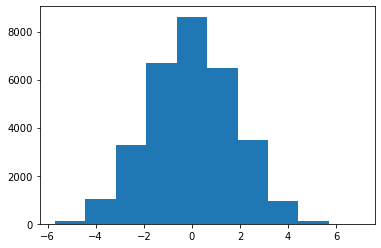

In [214]:
from matplotlib import pyplot as plt 
q_compl = coefs[0][N_players:]
print(f"среднее значение {np.mean(q_compl)}")
plt.hist(q_compl)
plt.show()

## Предложения по ранжированию команд. 


### Поскольку в 2020 году мы не знаем сложность вопросов, будем брать ее средней, т е = 0 . Кроме того, в 2020 есть игроки, которые не принимали участие в 2019 году. для них также возьмем среднюю "силу" по результатам 2019 г, (возьмем свободный вес лог регресии)

## 1

### В качестве вероятности ответа игрока на вопрос берем сигмоиду от (сили игрока + сложность вопроса). Вероятность ответа возьмем как 1 - Вероятность(все неправильно ответили на вопрос). Далее возьмем порог, например 0.5. Если итоговая вероятность > 0.5, то считаем что ответили на вопрос правильно. 
### Далее ранжируем команды по количеству ошибок (неправильных ответов), чтобы удобно было "запихнуть" этот массив кол-ва неправильных ответов в корреляцию

## 2
### Поскольку мы берем сложность вопроса одинаковую для всех, то получается, что в конечном итоге рейтинг команды будет зависеть от силы ее игроков. На самом деле это так в независимости от сложности вопроса. Поэтому возьмем среднюю силу игрока в команде, и отранжируем команды по средней силе



In [ ]:
strongs = coefs[0][:N_players]

In [236]:
def return_strength(old_id, pids_set, strongs, intercept):
    #print(old_id)
    if old_id not in pids_set: # игрока не было (не учитывался) в 2019
        return intercept
    else:
        return strongs[pids_old2new[old_id]]

In [273]:
def return_teams_strength_for_all_tourns(test, lr, ids):
    ts_preds = []
    coefs = lr.coef_[0]
    intercept = lr.intercept_[0]
    for t in test_ts:
        #print('ts_id', t[0])
        teams = t[1]
        strs = []
        for plids in teams:
            #strs = []
            team_strength = 0
            #print(plids)
            #print(len(plids))
            if plids:
                for plid in plids:
                    team_strength += return_strength(plid, ids, coefs, intercept)            
            strs.append(team_strength/max(len(plids),1))
        ts_preds.append(strs)
    return ts_preds    

In [283]:
ts_preds = return_teams_strength_for_all_tourns(test_ts, lr, ids)

## Значения корреляций
### для каждого турнира, вычтем из макс значения  среди вмех сил на данном турнире значения сил команд: 
### str[i] = max(str[1],...,str(n)) - str[i].  
### Полученные значения можно давать на вход корреляции Спирмена

In [322]:
from scipy.stats import spearmanr
import math

In [284]:
for i in range(len(ts_preds)):
    ts_preds[i] = [max(ts_preds[i]) - strength for strength in ts_preds[i]]

In [326]:
corrs = []
true_ranges = [t[4] for t in test_ts]
for true_range, strengths in zip(true_ranges, ts_preds):
    corrs.append(spearmanr(true_range, strengths).correlation)
corrs = [corr for corr in corrs if not math.isnan(corr)]    
corrs = np.array(corrs)    

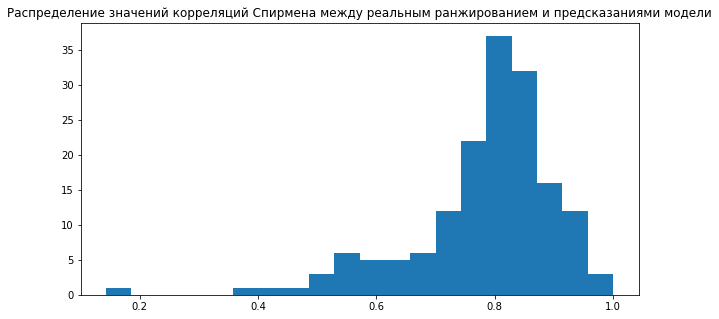

cреднее значение корреляции = 0.7807061292848638


In [331]:
plt.figure(figsize=(10,5))
plt.hist(corrs, bins=20)
plt.title("Распределение значений корреляций Спирмена между реальным ранжированием и предсказаниями модели")

plt.show()
print(f"cреднее значение корреляции = {np.mean(corrs)}")

### Среднее значение корреляции Спирмена между реальным ранжированием и предсказаниями модели 0.78. Распределение значений корреляций для тестовых турниров(всего 164) приведено выше на гистограмме

# Выводы

### Итак, на данный момент обучили модель лог регрессии на данных по играм за 2019 год. Матрица, по которой обучалась лог регрессия выглядела следующим образом: первые N столбцов = количеству различных игроков, следующие M столбцов - количеству вопросов. Каждая строка означала вероятность ответа i-ым игроком на j-ый вопрос. Таким образом, в каждой строке только две "одиницы", остальные нули. Топ 15 игроков по результатам модели:

In [334]:
print('балл              ФИО')
for pi, c in zip(p[:15], best_c[:15]):
    print(np.round(c,3), pi['name'], pi['patronymic'], pi['surname'])

балл              ФИО
4.157 Максим Михайлович Руссо
4.03 Александра Владимировна Брутер
3.985 Иван Николаевич Семушин
3.896 Михаил Владимирович Савченков
3.817 Сергей Леонидович Спешков
3.816 Артём Сергеевич Сорожкин
3.698 Станислав Григорьевич Мереминский
3.643 Михаил Ильич Левандовский
3.604 Ирина Сергеевна Прокофьева
3.584 Сергей Игоревич Николенко
3.551 Илья Сергеевич Новиков
3.551 Антон Владимирович Саксонов
3.549 Александр Витальевич Либер
3.513 Игорь Викторович Мокин
3.511 Александр Владимирович Мосягин


### Далее, на основании сил игроков, были предсказаны результаты игр в 2020 году. Рейтинг по предсказаниям модели строился на основе средней силы игроков в команде, что кажется логичным (результат завчисит от силы игроков, а не от вопросов).Результат в виде распределения значений корреляции и среднего значения приведен выше.

### PS. Реализация ЕМ алгоритма будет прислана через несколько дней. Извиняюсь за задержку